In [ ]:
#Dataset
#https://www.kaggle.com/datasets/jbuchner/synthetic-speech-commands-dataset?select=augmented_dataset

In [1]:
import librosa as lr
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import IPython.display as ipd
import keras
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pickle as pk
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
dataset='augmented_dataset1/augmented_dataset'
pd.DataFrame(os.listdir(dataset),columns=['Files'])

,Files
0,bed
1,bird
2,cat
3,dog
4,down
5,eight
6,five
7,four
8,go
9,happy


In [3]:
def count(path):
    size=[]
    for file in os.listdir(path):
        size.append(len(os.listdir(os.path.join(path,file))))
    return pd.DataFrame(size,columns=['Number Of Sample'],index=os.listdir(path))  


In [4]:
tr=count(dataset)
tr

,Number Of Sample
bed,1356
bird,1346
cat,1378
dog,1474
down,1188
eight,1113
five,1092
four,2400
go,960
happy,1481


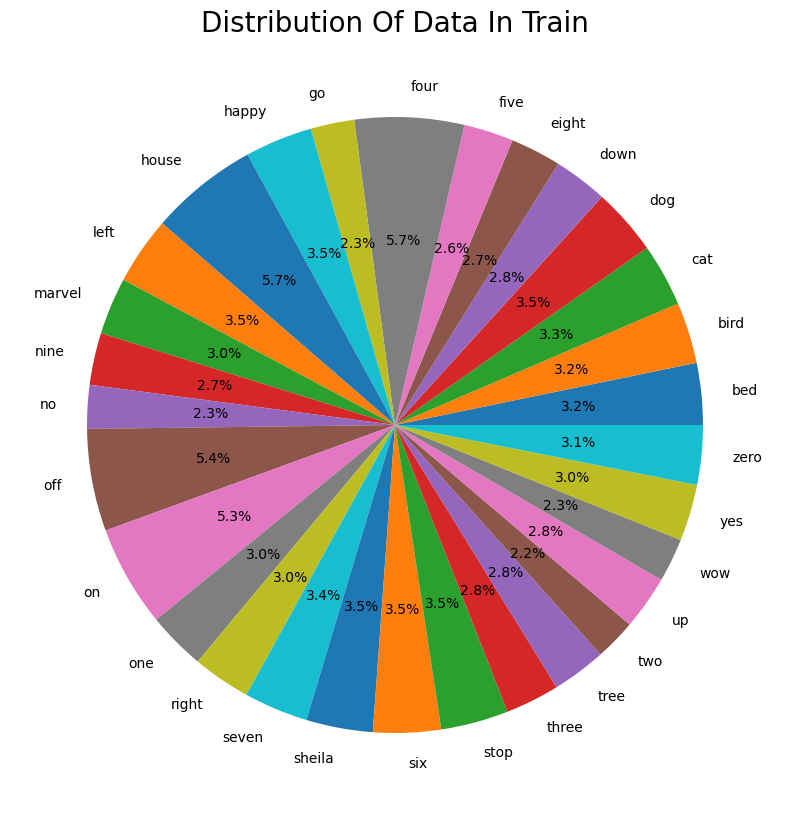

In [5]:
plt.figure(figsize=(10,10))
plt.pie(x='Number Of Sample',labels=os.listdir(dataset),autopct ='%1.1f%%',data=tr)
plt.title('Distribution Of Data In Train',fontsize=20)
plt.show()

Text(0, 0.5, 'Count')

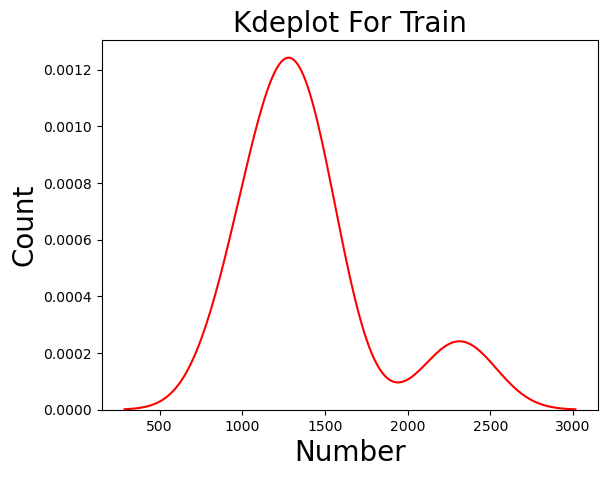

In [6]:
sns.kdeplot(tr['Number Of Sample'], color='red')
plt.title('Kdeplot For Train', fontsize=20)
plt.xlabel('Number', fontsize=20)
plt.ylabel('Count', fontsize=20)

In [7]:
ipd.Audio('augmented_dataset1/augmented_dataset/bed/1014.wav')

In [8]:
ipd.Audio('augmented_dataset1/augmented_dataset/bird/1019.wav')

In [9]:
ipd.Audio('augmented_dataset1/augmented_dataset/cat/1009.wav')

In [10]:
ipd.Audio('augmented_dataset1/augmented_dataset/yes/1014.wav')

In [11]:
def load(path):
    data=[]
    label=[]
    sample=[]
    for file in os.listdir(path):
        path_=os.path.join(path,file)
        for fil in os.listdir(path_):
            data_contain,sample_rate=lr.load(os.path.join(path_,fil) ,sr=16000)
            data.append(data_contain)
            sample.append(sample_rate)
            label.append(file)
    return data,label,sample

In [12]:
data,label,sample=load(dataset)
df=pd.DataFrame()
df['Label'],df['sample']=label,sample
df

,Label,sample
0,bed,16000
1,bed,16000
2,bed,16000
3,bed,16000
4,bed,16000
...,...,...
41844,zero,16000
41845,zero,16000
41846,zero,16000
41847,zero,16000


In [13]:
def waveform(data,sr,label):
    plt.figure(figsize=(14, 5))
    lr.display.waveshow(data, sr=sr)
    plt.suptitle(label)
    plt.title('Waveform plot')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
#MFCC features
def mfcc(data, sr):
    mfccs = lr.feature.mfcc(y=data, sr=sr)
    return np.mean(mfccs), mfccs
def mfcc_v(mfccs,label):
    plt.figure(figsize=(10, 4))
    lr.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title('MFCC')
    plt.suptitle(label)
#Mel-spectrogram
def Mel(data, sr):
    mel_spec = lr.feature.melspectrogram(y=data, sr=sr)
    return np.mean(mel_spec), mel_spec
def mel_v(mel_spec,label,sr):
    # Convert to decibel scale
    mel_spec_db = lr.power_to_db(mel_spec, ref=np.max)
    # Visualize Mel-spectrogram
    plt.figure(figsize=(10, 4))
    lr.display.specshow(mel_spec_db, x_axis='time', y_axis='mel', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-spectrogram')
    plt.suptitle(label)
#zero_crossing_rate
def zero_crossing(data,sr):
    # Compute zero-crossing rate
    zcr = lr.feature.zero_crossing_rate(data)
    # Print average zero-crossing rate
    avg_zcr = sum(zcr[0])/len(zcr[0])
    print("Average zero-crossing rate:", avg_zcr)
    return zcr
def zero_crossing_v(zcr,label,data,sr):
    time = lr.times_like(zcr)
    # Create waveform plot
    plt.figure(figsize=(14, 5))
    lr.display.waveshow(data, sr=sr, alpha=0.5)
    plt.plot(time, zcr[0], color='r')
    plt.title('Zero-crossing rate')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.suptitle(label)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


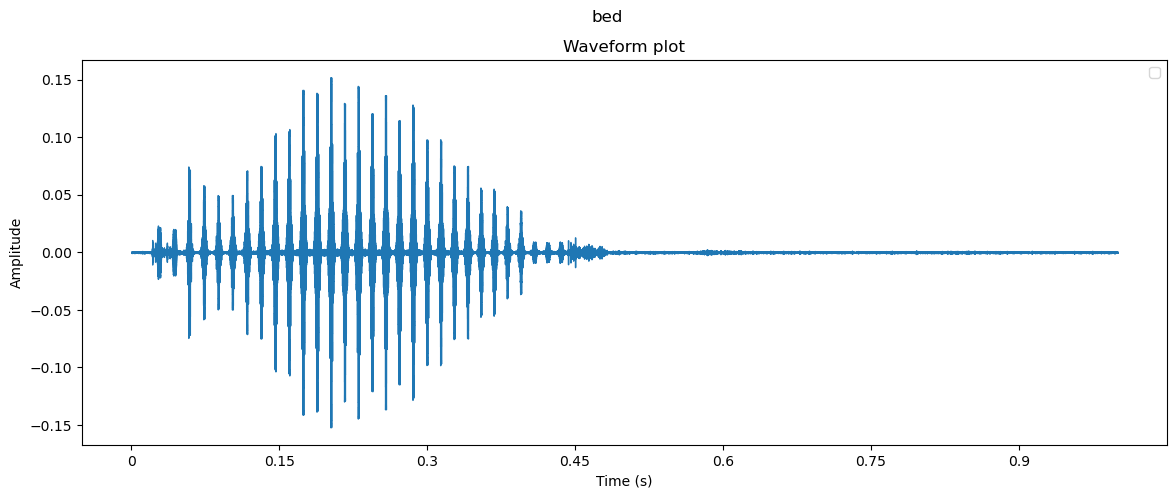

In [14]:
waveform(data[0],sample[0],label[0])
plt.legend()
plt.show()

MFCCs Mean: -22.473103
MFCCs shape: (20, 32)


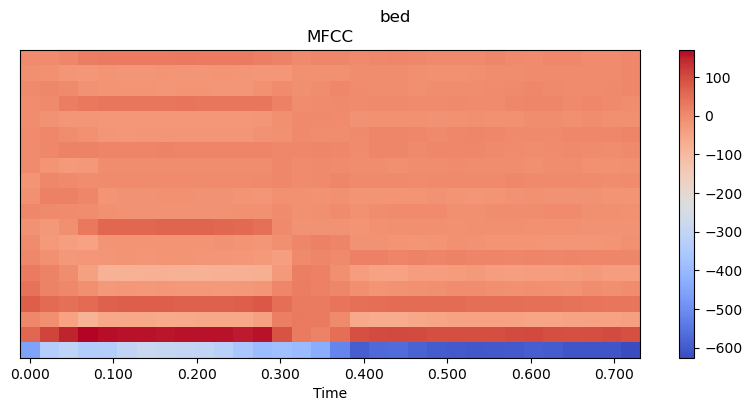

In [15]:
mfccs_mean, mfccs = mfcc(data[0], sample[0])
print('MFCCs Mean:', mfccs_mean)
print('MFCCs shape:', mfccs.shape)
mfcc_v(mfccs,label[0])

Mel Mean: 0.04585984
Mel : (128, 32)


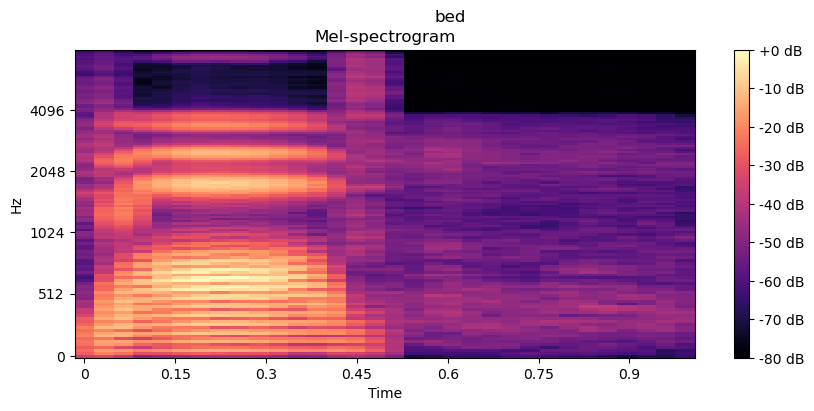

In [16]:
##Mel-spectrogram data[0]
mel_mean,mel=Mel(data[0],sample[0])
print('Mel Mean:',mel_mean)
print('Mel :',mel.shape)
mel_v(mel,label[0],sample[0])

Average zero-crossing rate: 0.1768035888671875
Zcr: (1, 32)


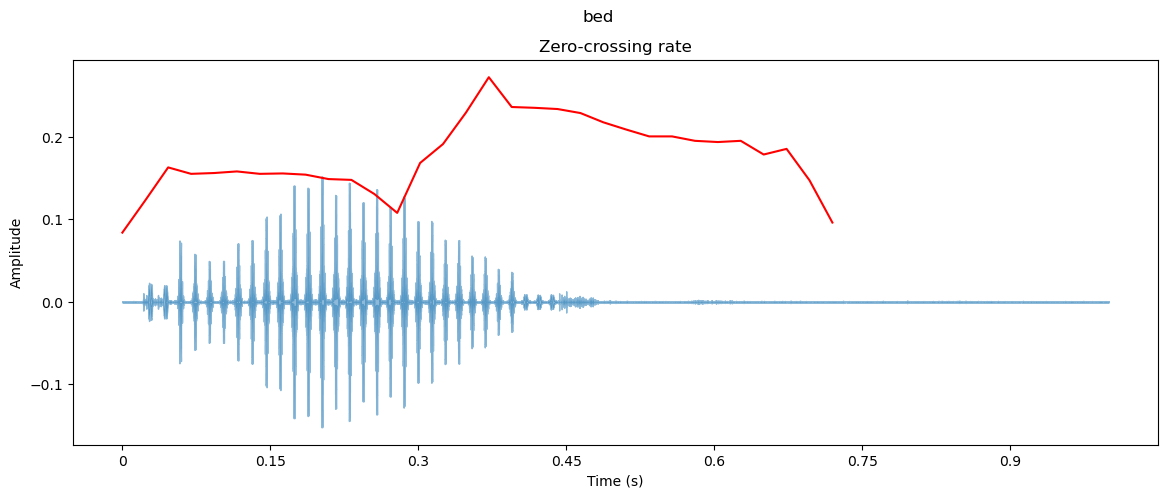

In [17]:
#zero_crossing data[0]
zcr=zero_crossing(data[0],sample[0])
print('Zcr:',zcr.shape)
zero_crossing_v(zcr,label[0],data[0],sample[0])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


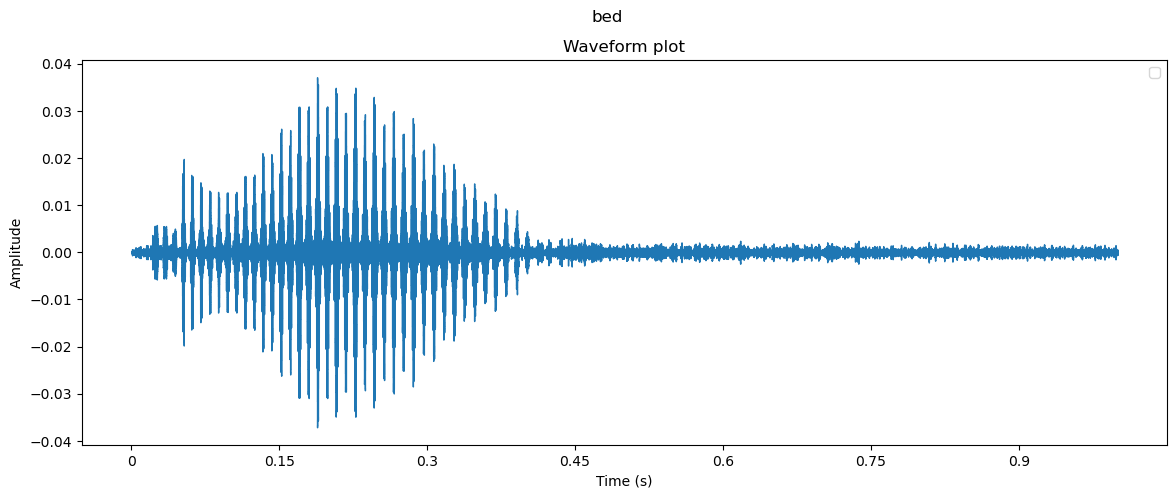

In [18]:
#waveform data[1000]
waveform(data[1000],sample[1000],label[1000])
plt.legend()

MFCCs Mean: -20.8931
MFCCs shape: (20, 32)


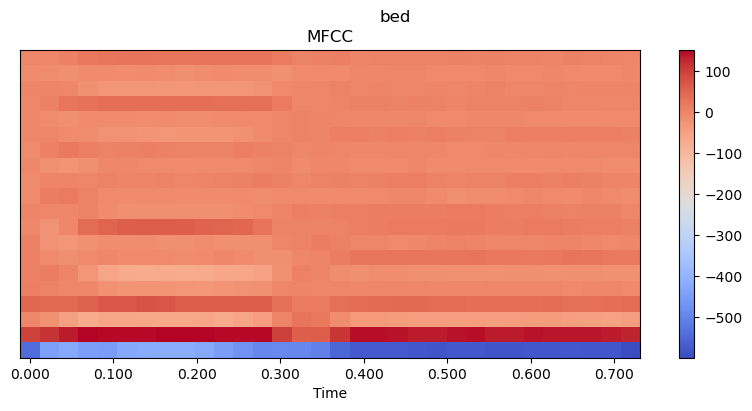

In [19]:
#MFCC data[1000]
mfccs_mean, mfccs = mfcc(data[1000], sample[1000])
print('MFCCs Mean:', mfccs_mean)
print('MFCCs shape:', mfccs.shape)
mfcc_v(mfccs,label[1000])

Mel Mean: 0.0037993134
Mel : (128, 32)


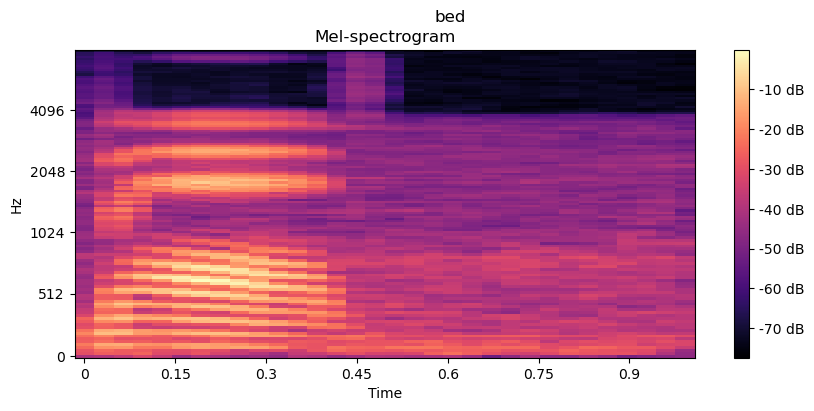

In [20]:
##Mel-spectrogram data[1000]
mel_mean,mel=Mel(data[1000],sample[1000])
print('Mel Mean:',mel_mean)
print('Mel :',mel.shape)
mel_v(mel,label[1000],sample[1000])

Average zero-crossing rate: 0.1236572265625
Zcr: (1, 32)


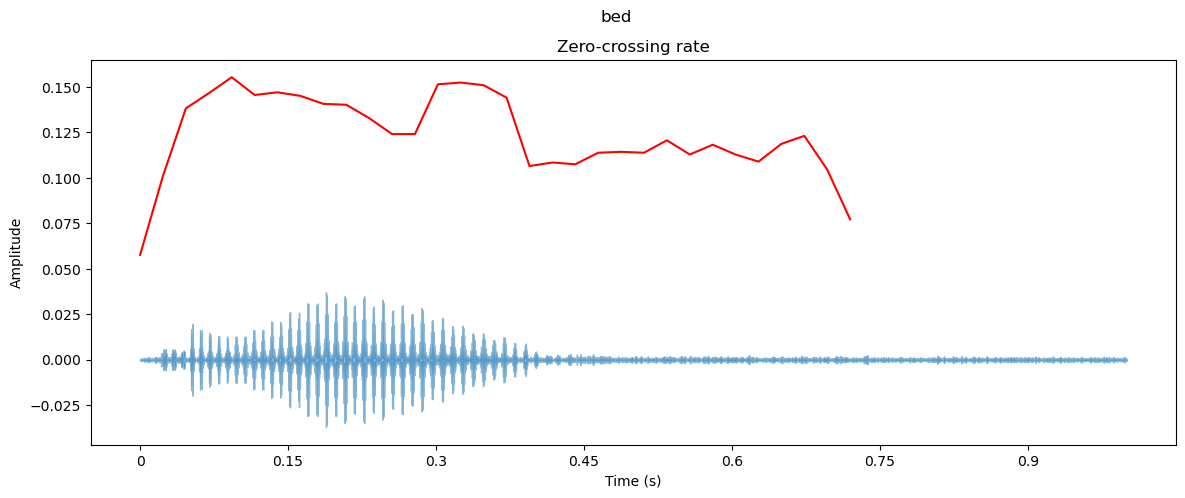

In [21]:
#zero_crossing data[1000]
zcr=zero_crossing(data[1000],sample[1000])
print('Zcr:',zcr.shape)
zero_crossing_v(zcr,label[1000],data[1000],sample[1000])

In [22]:
code={}
x=0
for i in pd.unique(label):
    code[i]=x
    x+=1
pd.DataFrame(code.values(),columns=['Value'],index=code.keys()) 

,Value
bed,0
bird,1
cat,2
dog,3
down,4
eight,5
five,6
four,7
go,8
happy,9


In [23]:
def get_Name(N):
    for x,y in code.items():
          if y==N:
                return x
for i in range(len(label)):
    label[i]=code[label[i]]
pd.DataFrame(label,columns=['Labels']) 

,Labels
0,0
1,0
2,0
3,0
4,0
...,...
41844,29
41845,29
41846,29
41847,29


In [24]:
data=np.array(data).reshape(-1,16000,1)
label=np.array(label)
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.1, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (37664, 16000, 1)
X_test shape is  (4185, 16000, 1)
y_train shape is  (37664,)
y_test shape is  (4185,)


In [25]:
num_class=len(pd.unique(label))
model=keras.Sequential()
model.add(keras.layers.Conv1D(filters=8, kernel_size=13,activation=tf.nn.relu,input_shape=(16000,1)))
model.add(keras.layers.MaxPooling1D(3))
model.add(keras.layers.Dropout(.3))
model.add(keras.layers.Conv1D(filters=16, kernel_size=11,activation=tf.nn.relu))
model.add(keras.layers.MaxPooling1D(3))
model.add(keras.layers.Dropout(.3))
model.add(keras.layers.Conv1D(filters=32, kernel_size=9,activation=tf.nn.relu))
model.add(keras.layers.MaxPooling1D(3))
model.add(keras.layers.Dropout(.3))
model.add(keras.layers.Conv1D(filters=64, kernel_size=7,activation=tf.nn.relu))
model.add(keras.layers.MaxPooling1D(3))
model.add(keras.layers.Dropout(.3))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256,activation=tf.nn.relu))
model.add(keras.layers.Dropout(.3))
model.add(keras.layers.Dense(128,activation=tf.nn.relu))
model.add(keras.layers.Dropout(.3))
model.add(keras.layers.Dense(num_class,activation=tf.nn.softmax))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 15988, 8)          112       
                                                                 
 max_pooling1d (MaxPooling1  (None, 5329, 8)           0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 5329, 8)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 5319, 16)          1424      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 1773, 16)          0         
 g1D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 1773, 16)          0

In [27]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [29]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=120)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [30]:
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
hist=model.fit(X_train,y_train,epochs=30)

Epoch 1/30
1177/1177 [==============================] - 556s 469ms/step - loss: 2.2705 - accuracy: 0.3169
Epoch 2/30
1177/1177 [==============================] - 272s 231ms/step - loss: 1.1396 - accuracy: 0.6256
Epoch 3/30
1177/1177 [==============================] - 287s 244ms/step - loss: 0.7563 - accuracy: 0.7502
Epoch 4/30
1177/1177 [==============================] - 288s 245ms/step - loss: 0.5747 - accuracy: 0.8086
Epoch 5/30
1177/1177 [==============================] - 282s 239ms/step - loss: 0.4689 - accuracy: 0.8442
Epoch 6/30
1177/1177 [==============================] - 303s 258ms/step - loss: 0.3992 - accuracy: 0.8662
Epoch 7/30
1177/1177 [==============================] - 293s 249ms/step - loss: 0.3620 - accuracy: 0.8805
Epoch 8/30
1177/1177 [==============================] - 289s 246ms/step - loss: 0.3179 - accuracy: 0.8964
Epoch 9/30
1177/1177 [==============================] - 271s 230ms/step - loss: 0.3002 - accuracy: 0.9015
Epoch 10/30
1177/1177 [=======================

In [31]:
loss,acc=model.evaluate(X_test,y_test)
print('Loss is :',loss)
print('ACC is :',acc)

131/131 [==============================] - 6s 44ms/step - loss: 0.1078 - accuracy: 0.9663
Loss is : 0.10777142643928528
ACC is : 0.9663082361221313


In [32]:
hist_=hist.history
pd.DataFrame(hist_)

,loss,accuracy
0,2.270514,0.316934
1,1.139586,0.625611
2,0.756253,0.750239
3,0.574712,0.808624
4,0.468944,0.844228
5,0.399227,0.866238
6,0.362012,0.880522
7,0.317877,0.896426
8,0.300213,0.901524
9,0.270363,0.910843


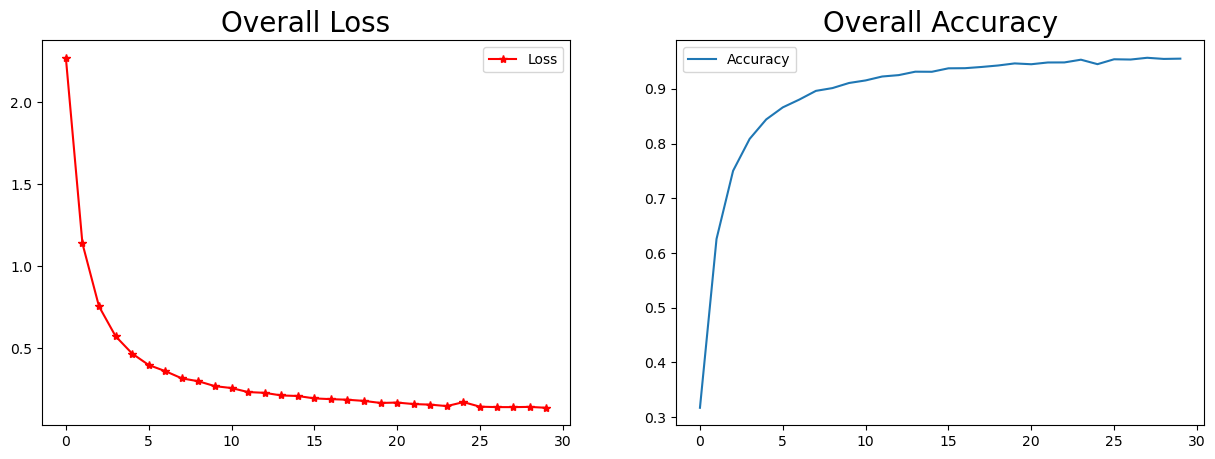

In [33]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],c='r',marker='*',label='Loss')
plt.title('Overall Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Accuracy')
plt.title('Overall Accuracy',fontsize=20)
plt.legend()

In [34]:
predict=model.predict(X_test)
predict[0]

131/131 [==============================] - 7s 49ms/step


array([6.1473999e-21, 2.9727269e-18, 1.4555949e-17, 1.9343560e-08,
       3.8121609e-14, 4.1517651e-24, 1.9376034e-10, 9.9999988e-01,
       4.3263143e-11, 1.1254738e-26, 1.2785926e-11, 5.8530265e-25,
       1.3778639e-21, 8.0495690e-27, 1.5494881e-20, 5.2377627e-09,
       1.3731030e-16, 8.6887444e-24, 3.9161117e-18, 5.8113115e-25,
       3.0170397e-12, 2.9574152e-31, 6.0269869e-08, 1.7771508e-24,
       6.0052159e-24, 6.1905136e-13, 3.2076630e-11, 1.3277607e-13,
       1.0379267e-27, 5.1219574e-16], dtype=float32)

In [35]:
preN=[]
prename=[]
for row in predict:
    N=np.argmax(row)
    preN.append(N)
    prename.append(get_Name(N))
pd.DataFrame(prename,columns=['Predictions'])

,Predictions
0,four
1,stop
2,left
3,four
4,up
...,...
4180,dog
4181,cat
4182,on
4183,four


In [37]:
predict=[]
y_act=[]
for p in range(30):
    y_act.append(get_Name(y_test[p]))
    predict.append(prename[p])
pd_p=pd.DataFrame(y_act,columns=['y_act'])  
pd_p['predict']=predict
pd_p

,y_act,predict
0,four,four
1,stop,stop
2,left,left
3,wow,four
4,up,up
5,nine,nine
6,sheila,sheila
7,house,house
8,one,one
9,no,no


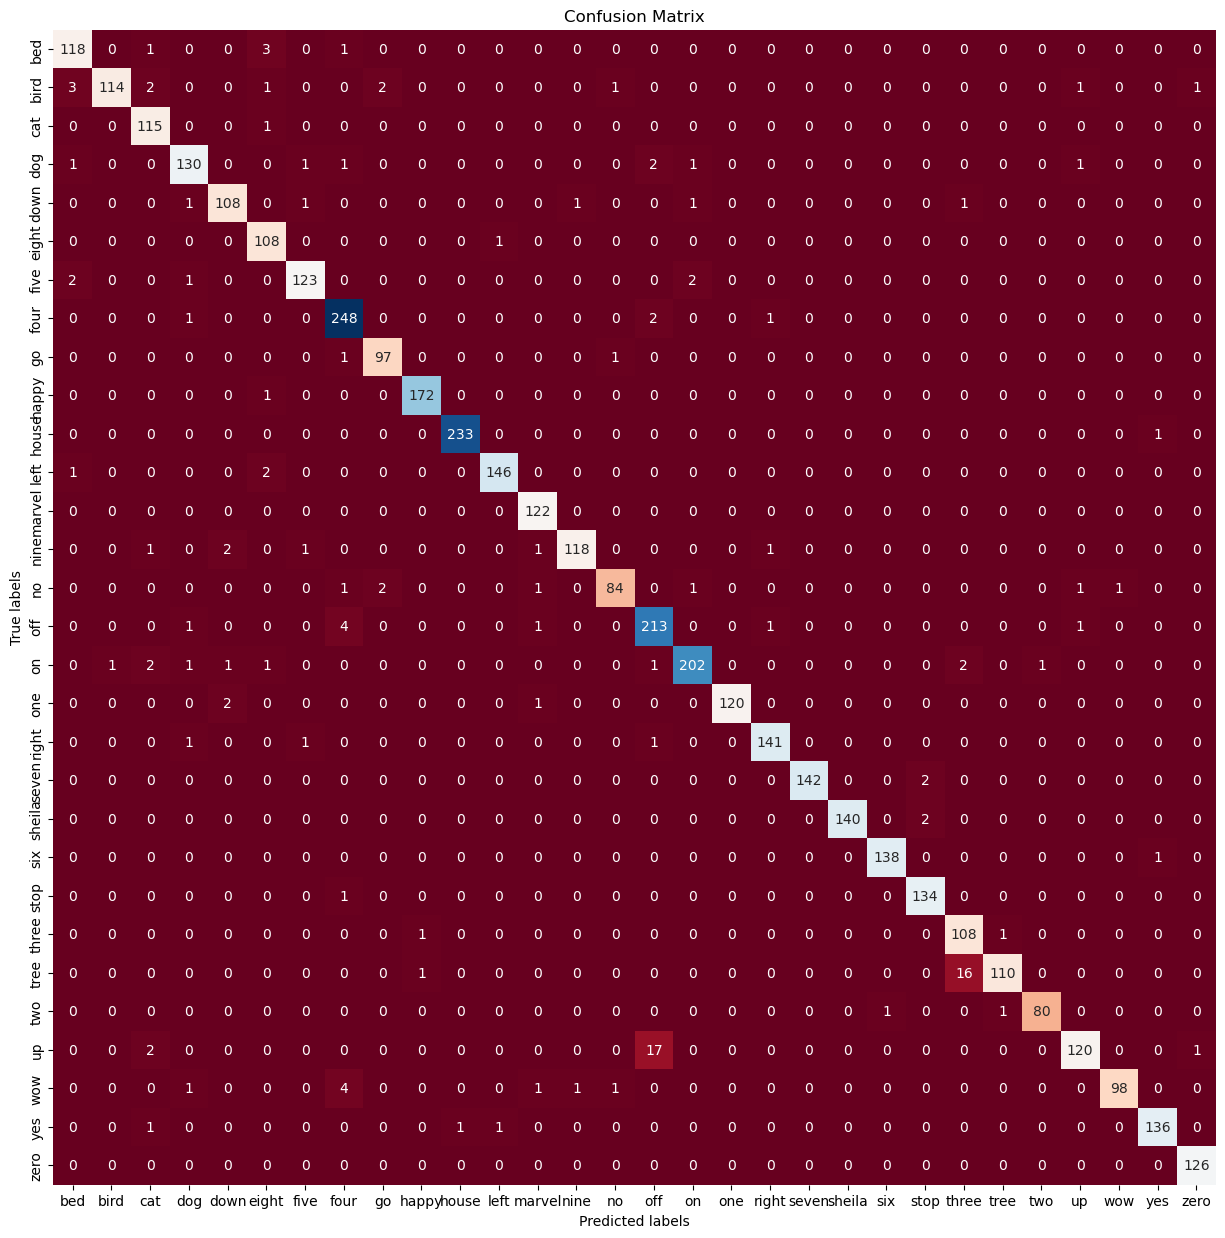

array([[118,   0,   1,   0,   0,   3,   0,   1,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  3, 114,   2,   0,   0,   1,   0,   0,   2,   0,   0,   0,   0,
          0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   0,   0,   1],
       [  0,   0, 115,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  1,   0,   0, 130,   0,   0,   1,   1,   0,   0,   0,   0,   0,
          0,   0,   2,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   0,   0,   0],
       [  0,   0,   0,   1, 108,   0,   1,   0,   0,   0,   0,   0,   0,
          1,   0,   0,   1,   0,   0,   0,   0,   0,   0,   1,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 108,   0,   0,   0,   0,   0,   1,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,

In [38]:
plt.figure(figsize=(15,15))
ax= plt.subplot()
CM = confusion_matrix(y_test, preN)
sns.heatmap(CM, annot=True, fmt='g', ax=ax,cbar=False,cmap='RdBu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(code.keys()) 
ax.yaxis.set_ticklabels(code.keys())
plt.show()
CM

In [39]:
ClassificationReport = classification_report(y_test,preN)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.94      0.96      0.95       123
           1       0.99      0.91      0.95       125
           2       0.93      0.99      0.96       116
           3       0.95      0.95      0.95       137
           4       0.96      0.96      0.96       113
           5       0.92      0.99      0.96       109
           6       0.97      0.96      0.96       128
           7       0.95      0.98      0.97       252
           8       0.96      0.98      0.97        99
           9       0.99      0.99      0.99       173
          10       1.00      1.00      1.00       234
          11       0.99      0.98      0.98       149
          12       0.96      1.00      0.98       122
          13       0.98      0.95      0.97       124
          14       0.97      0.92      0.94        91
          15       0.90      0.96      0.93       221
          16       0.98      0.95      0.96       212

In [42]:
model.save("network.h5")

In [43]:
model.save_weights("network1.h5")